In [1]:
import numpy as np
import cv2

In [2]:
#Display frames from array in a pop up window (playbackspeed not the same as original video's)
def display(video_frames):
    for frame in video_frames:
        cv2.imshow('frame',frame)
        cv2.waitKey(1) #sleep 1 milisecond
    cv2.destroyAllWindows()

In [3]:
# Unfinished
def encode(frames):
    for frame in frames:
        writer.writeFrame(frame)
    writer.close()

In [4]:
cap = cv2.VideoCapture('Evening_landing.mp4') #Read the video File

frames = []

while(cap.isOpened()):
    ret,frame = cap.read() #akan dibaca frame per frame, var frame akan menyimpan nilai pembacaanya 
    if not ret:  
        print("Reading Video Done. Total Frame : %d" % (cap.get(cv2.CAP_PROP_FRAME_COUNT)))
        break
        
    frames.append(frame)

    
display(frames)

Reading Video Done. Total Frame : 765


In [5]:
#turn numpy array into normal arrays
video = np.stack(frames, axis=0) # dimensions (T, H, W, C)
num_frames, height, width, _ = video.shape
fps = cap.get(cv2.CAP_PROP_FPS) #get fps from original video
print(num_frames)
print(width)
print(height)
print(fps)

display(video)

765
1280
720
25.0


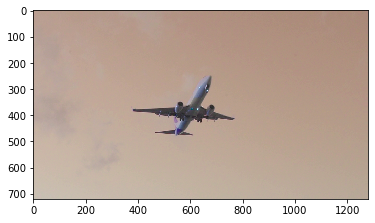

In [6]:
# See the first or any number of frame as image
from matplotlib import pyplot as plt
plt.imshow(frames[200], interpolation='nearest')
plt.show()

In [7]:
#Frame array to video
filename = "DoneVid.mp4"
fourcc = cv2.VideoWriter_fourcc('H','2','6','4')
fourcc=int(fourcc)
out = cv2.VideoWriter(filename, fourcc, fps, (width, height))

for frame in np.split(video, num_frames, axis=0):
    out.write(frame)